In [2]:
# %load_ext autoreload
# %autoreload 2
import os 
# os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
# os.environ['XLA_PYTHON_CLIENT_MEM_FRACTION']='.85'
# os.environ['CUDA_VISIBLE_DEVICES'] = '5'
#jupyter nbconvert --to notebook --execute demo_notebook.ipynb --output demo_notebook.ipynb
# 

In [3]:
import sys
sys.path.append('/home/amawi/projects/nn_ansatz/src')
from nn_ansatz import *
from jax.experimental.optimizers import adam
from jax import tree_util
from tqdm.notebook import trange
from jax import pmap, vmap, grad

In [13]:
# using routines
translations = [np.random.uniform(0, 0.5, (1, 3)) for i in range(7)]

e_means = []
for translation in translations:
    cfg = setup(system='LiSolidBCC',
                n_pre_it=0,
                n_walkers=512,
                n_layers=3,
                n_sh=32,
                step_size=0.02,
                n_ph=8,
                scalar_inputs=False,
                orbitals='anisotropic',
                n_periodic_input=1,
                opt='adam',
                n_det=4,
                print_every=100,
                save_every=2500,
                lr=1e-4,
                n_it=20000)
    cfg['r_atoms'] += jnp.array(translation)
    log = run_vmc(cfg)
    e_mean = log.summary['e_mean_mean']
    e_means.append(e_mean)

with open('data.pk', 'wb') as f:
    pk.dump(e_means, f)

s32_p8_l3_det4 adam_1lr-4_1d-3_1nc-4_m512_ junk
version 		 111021
seed 		 369
n_devices 		 1
save_every 		 2500
print_every 		 100
exp_dir 		 /home/amawi/projects/nn_ansatz/src/demos/move_atom_positions/Li_translating_system/experiments/LiSolidBCC/111021/junk/adam_1lr-4_1d-3_1nc-4_m512_s32_p8_l3_det4/run6
events_dir 		 /home/amawi/projects/nn_ansatz/src/demos/move_atom_positions/Li_translating_system/experiments/LiSolidBCC/111021/junk/adam_1lr-4_1d-3_1nc-4_m512_s32_p8_l3_det4/run6/events
models_dir 		 /home/amawi/projects/nn_ansatz/src/demos/move_atom_positions/Li_translating_system/experiments/LiSolidBCC/111021/junk/adam_1lr-4_1d-3_1nc-4_m512_s32_p8_l3_det4/run6/models
opt_state_dir 		 /home/amawi/projects/nn_ansatz/src/demos/move_atom_positions/Li_translating_system/experiments/LiSolidBCC/111021/junk/adam_1lr-4_1d-3_1nc-4_m512_s32_p8_l3_det4/run6/models/opt_state
pre_path 		 /home/amawi/projects/nn_ansatz/src/demos/move_atom_positions/Li_translating_system/experiments/LiSolidBCC/pret

training:   0%|          | 1/10001 [00:00<?, ?it/s]

step 100 | e_mean -11.7368 | e_std 6.5033 | e_mean_mean -11.3310 | acceptance 0.6307 | t_per_it 0.2767 |
step 200 | e_mean -12.6552 | e_std 8.4840 | e_mean_mean -12.1602 | acceptance 0.4922 | t_per_it 0.3262 |
step 300 | e_mean -12.6221 | e_std 4.6459 | e_mean_mean -12.5206 | acceptance 0.4914 | t_per_it 0.3312 |
step 400 | e_mean -12.6467 | e_std 4.1731 | e_mean_mean -12.8670 | acceptance 0.4982 | t_per_it 0.3118 |
step 500 | e_mean -13.1173 | e_std 4.2218 | e_mean_mean -13.1933 | acceptance 0.5104 | t_per_it 0.3046 |
step 600 | e_mean -13.8792 | e_std 5.8487 | e_mean_mean -13.5738 | acceptance 0.5123 | t_per_it 0.2996 |
step 700 | e_mean -13.8584 | e_std 3.9920 | e_mean_mean -14.0185 | acceptance 0.5084 | t_per_it 0.3159 |
step 800 | e_mean -14.5345 | e_std 4.8519 | e_mean_mean -14.3614 | acceptance 0.4924 | t_per_it 0.3075 |
step 900 | e_mean -14.8437 | e_std 3.9932 | e_mean_mean -14.6549 | acceptance 0.4895 | t_per_it 0.3055 |
step 1000 | e_mean -14.8666 | e_std 3.4146 | e_mean_mea

KeyboardInterrupt: 

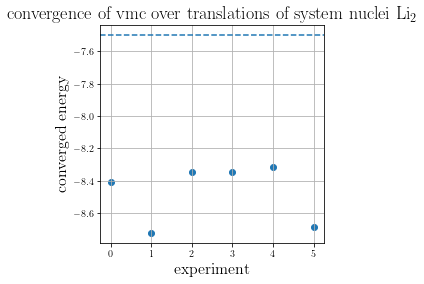

In [12]:
import matplotlib.pyplot as plt
x = range(len(e_means))
fig, ax = plot.pretty_base(xlabel='experiment', ylabel='converged energy', 
                            title='convergence of vmc over translations of system nuclei Li$_2$',
                            ylines=[-7.5])
ax.scatter(x, [x/2. for x in e_means])
plt.savefig('system_translations.png')